In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [2]:
#Data preprocessing
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]      # Number of training images
Nte = x_test.shape[0]       # Number of test images
Din = 3072 # CIFAR10        # 3x32x32 (32x32 colour image)
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Create weight and bias arrays
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr


w1: (3072, 10)
b1: (10,)


In [3]:
iterations =  300
lr = 1.3e-2         #learning rate
lr_decay=0.999      #learning rate decay
reg = 5e-6          
train_loss_history = []     #loss of training set at each iteration 
test_loss_history = []      #loss of test set at each iteration 
train_acc_history = []      #accuracy of training set at each iteration 
val_acc_history = []        #accuracy of test set at each iteration 
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x_t = x_train[indices]
    y_t = y_train[indices]
    
    # Forward pass
    y_pred_t = x_t.dot(w1) + b1
    y_pred_v = x_test.dot(w1) + b1
    # Calculate loss and put values to corresponding list
    train_loss = 1./batch_size*np.square(y_pred_t-y_t).sum() + reg* np.sum(w1*w1)
    train_loss_history.append(train_loss)
    
    test_loss = 1./Nte*np.square(y_pred_v-y_test).sum() + reg* np.sum(w1*w1)
    test_loss_history.append(test_loss)

    #Calculate accuracy and put values to corresponding list
    train_acc= (1/Ntr)*(np.abs(np.argmax(y_t, axis=1)==np.argmax(y_pred_t, axis=1))).sum()
    train_acc_history.append(train_acc)

    val_acc=(1/Nte)*(np.abs(np.argmax(y_test, axis=1)==np.argmax(y_pred_v, axis=1))).sum()
    val_acc_history.append(val_acc)

    if t%10==0:
        print('Epoch: %d / %d , learning rate: %f , training loss: %f , test loss: %f , training accuracy %f , testing accuracy %f' % (t, iterations, lr, train_loss, test_loss, train_acc, val_acc))
        
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred_t-y_t)
    dw1=x_t.T.dot(dy_pred) + reg*w1
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *=lr_decay


Epoch: 0 / 300 , learning rate: 0.013000 , training loss: 0.999989 , test loss: 0.999989 , training accuracy 0.106520 , testing accuracy 0.108700
Epoch: 10 / 300 , learning rate: 0.012871 , training loss: 0.880180 , test loss: 0.879749 , training accuracy 0.351340 , testing accuracy 0.349000
Epoch: 20 / 300 , learning rate: 0.012742 , training loss: 0.846300 , test loss: 0.846142 , training accuracy 0.370280 , testing accuracy 0.373200
Epoch: 30 / 300 , learning rate: 0.012616 , training loss: 0.826950 , test loss: 0.827002 , training accuracy 0.380420 , testing accuracy 0.379800
Epoch: 40 / 300 , learning rate: 0.012490 , training loss: 0.815138 , test loss: 0.815392 , training accuracy 0.386560 , testing accuracy 0.387000
Epoch: 50 / 300 , learning rate: 0.012366 , training loss: 0.807639 , test loss: 0.808100 , training accuracy 0.391180 , testing accuracy 0.389400
Epoch: 60 / 300 , learning rate: 0.012243 , training loss: 0.802692 , test loss: 0.803364 , training accuracy 0.394780 

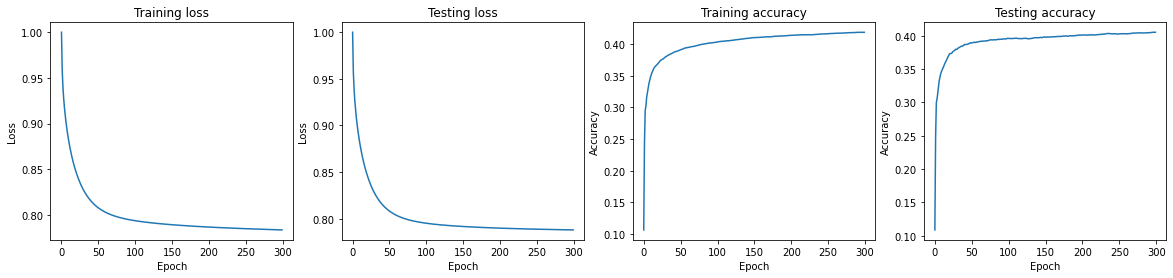

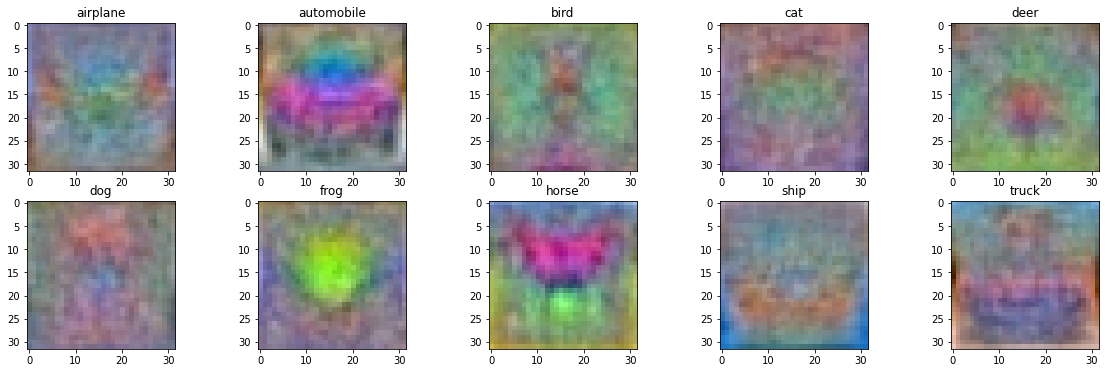

In [5]:
# Plotting losses and accuracies and displaying w as images
fig , ax = plt.subplots(figsize=(20,4 ))
plt.subplot(1,4,1)
plt.plot(train_loss_history)
plt.title("Training loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,2)
plt.plot(test_loss_history)
plt.title("Testing loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,3)
plt.plot(train_acc_history)
plt.title("Training accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,4,4)
plt.plot(val_acc_history)
plt.title("Testing accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
w_max=np.max(w1)
w_min=np.min(w1)
f, axarr = plt.subplots(2,5)
f.set_size_inches(20,6)
for i in range(2):
    for j in range(5):
        img = w1[:, 5*i+j].reshape(32, 32, 3)
        img = 255.0*(img.squeeze()-w_min)/(w_max-w_min)
        axarr[i,j].imshow(img.astype('uint8'))
        axarr[i,j].set_title(class_names[5*i+j])
plt.show()



